#**TECH CHALLENGE**


## O problema
Deep Learning e IA
Olá, estudante! Chegamos ao Tech Challenge da Fase 4. Nela, você
aprendeu sobre um tipo de aprendizado mais profundo e chegou o momento de
colocar isso em prática!

Seu desafio é criar um modelo preditivo de redes neurais Long Short
Term Memory (LSTM) para predizer o valor de fechamento da bolsa de valores
de uma empresa à sua escolha e realizar toda a pipeline de desenvolvimento,
desde a criação do modelo preditivo até o deploy do modelo em uma API que
permita a previsão de preços de ações.

Seu Tech Challenge precisa seguir os seguintes requisitos:
1. **Coleta e Pré-processamento dos Dados**
  - **Coleta de Dados:** utilize um dataset de preços históricos de ações,
como o Yahoo Finance ou qualquer outro dataset financeiro disponível
(dica: utilize a biblioteca yfinance). Veja um exemplo a seguir:

```
import yfinance as yf
# Especifique o símbolo da empresa que você vai trabalhar
# Configure data de início e fim da sua base
symbol = 'DIS'
start_date = '2018-01-01'
end_date = '2024-07-20'
# Use a função download para obter os dados
df = yf.download(symbol, start=start_date, end=end_date)
```

2. **Desenvolvimento do Modelo LSTM**
  - **Construção do Modelo:** implemente um modelo de deep learning utilizando LSTM para capturar padrões temporais nos dados de preços das ações.
  - **Treinamento:** treine o modelo utilizando uma parte dos dados e ajuste os hiperparâmetros para otimizar o desempenho.
  - **Avaliação:** avalie o modelo utilizando dados de validação e utilize métricas como MAE (Mean Absolute Error), RMSE (Root Mean Square Error), MAPE (Erro Percentual Absoluto Médio) ou outra métrica apropriada para medir a precisão das previsões.

3. **Salvamento e Exportação do Modelo**
  - Salvar o Modelo: após atingir um desempenho satisfatório, salve o modelo treinado em um formato que possa ser utilizado para inferência.

4. **Deploy do Modelo**
  - **Criação da API:** desenvolva uma API RESTful utilizando Flask ou FastAPI para servir o modelo. A API deve permitir que o usuário forneça dados históricos de preços e receba previsões dos preços futuros.

5. **Escalabilidade e Monitoramento**
  - **Monitoramento:** configure ferramentas de monitoramento para rastrear a performance do modelo em produção, incluindo tempo de resposta e utilização de recursos.

##Entregáveis:
Código-fonte do modelo LSTM no seu repositório do GIT +
documentação do projeto.

- Scripts ou contêineres Docker para deploy da API.
- Link para a API em produção, caso tenha sido deployada em um ambiente de nuvem.
- Vídeo mostrando e explicando todo o funcionamento da API.
Este desafio permitirá que você demonstre habilidades avançadas em deep learning, especificamente no uso de LSTM para séries temporais, bem como em práticas de deploy em ambientes de produção.



# Desenvolvimento

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
symbol_banco_brasil = 'BBAS3.SA'
start_date_banco_brasil = '2020-01-01'
end_date_banco_brasil = '2025-12-31'

df_banco_brasil = yf.download(symbol_banco_brasil, start=start_date_banco_brasil, end=end_date_banco_brasil)

print(f"Downloaded data for {symbol_banco_brasil} from {start_date_banco_brasil} to {end_date_banco_brasil}.")
print(df_banco_brasil.head())

/tmp/ipython-input-410436997.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_banco_brasil = yf.download(symbol_banco_brasil, start=start_date_banco_brasil, end=end_date_banco_brasil)
[*********************100%***********************]  1 of 1 completed

Downloaded data for BBAS3.SA from 2020-01-01 to 2025-12-31.
Price           Close       High        Low       Open    Volume
Ticker       BBAS3.SA   BBAS3.SA   BBAS3.SA   BBAS3.SA  BBAS3.SA
Date                                                            
2020-01-02  17.323467  17.378207  17.120608  17.178568  26319800
2020-01-03  17.294487  17.358887  17.017569  17.098068  18930800
2020-01-06  17.065865  17.194664  16.888766  17.194664  19999800
2020-01-07  16.937069  17.075528  16.837250  17.065868  21277000
2020-01-08  16.782511  17.062649  16.756752  16.988589  42937200


O código anterior baixou os dados com sucesso. O próximo passo lógico é realizar uma inspeção inicial do `df_banco_brasil`  para entender sua estrutura, tipos de dados e estatísticas básicas.


In [ ]:
print("DataFrame Info:")
df_banco_brasil.info()
print("\n---------------------------")
print("\nDataFrame Description:")
df_banco_brasil.describe()
print("\n---------------------------")
print("\nDataFrame Shape:")
print(df_banco_brasil.shape)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1494 entries, 2020-01-02 to 2025-12-30
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, BBAS3.SA)   1494 non-null   float64
 1   (High, BBAS3.SA)    1494 non-null   float64
 2   (Low, BBAS3.SA)     1494 non-null   float64
 3   (Open, BBAS3.SA)    1494 non-null   float64
 4   (Volume, BBAS3.SA)  1494 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.0 KB

---------------------------

DataFrame Description:

---------------------------

DataFrame Shape:
(1494, 5)


O DataFrame `df_banco_brasil` possui nomes de colunas com vários níveis, o que pode dificultar o trabalho com eles. Nivelá-los em nomes de nível único melhorará a legibilidade e facilitará o acesso para as etapas subsequentes de análise e visualização.


In [ ]:
df_banco_brasil.columns = ['_'.join(col).replace('.SA', '').strip() for col in df_banco_brasil.columns.values]
print("Flattened column names:")
print(df_banco_brasil.columns)
print("\nDataFrame head after flattening columns:")
print(df_banco_brasil.tail())

Flattened column names:
Index(['Close_BBAS3', 'High_BBAS3', 'Low_BBAS3', 'Open_BBAS3', 'Volume_BBAS3'], dtype='object')

DataFrame head after flattening columns:
            Close_BBAS3  High_BBAS3  Low_BBAS3  Open_BBAS3  Volume_BBAS3
Date                                                                    
2025-12-22    21.299999   21.549999  21.219999   21.440001      17942700
2025-12-23    21.750000   21.750000  21.309999   21.340000      14967000
2025-12-26    21.850000   21.889999  21.450001   21.500000       9742800
2025-12-29    21.719999   21.879999  21.600000   21.750000       9988400
2025-12-30    21.920000   22.129999  21.770000   21.770000      13121900


Após simplificar os nomes das colunas, é importante verificar se há valores ausentes no DataFrame df_banco_brasil para garantir a qualidade dos dados antes de prosseguir com análises ou visualizações adicionais.

In [ ]:
print("Missing values per column:")
print(df_banco_brasil.isnull().sum())

Missing values per column:
Close_BBAS3     0
High_BBAS3      0
Low_BBAS3       0
Open_BBAS3      0
Volume_BBAS3    0
dtype: int64


Para visualizar os dados históricos das ações, incluindo preço de fechamento, volume de negociação e retornos diários, usaremos as bibliotecas de plotagem `matplotlib.pyplot` e `seaborn`.

Criamos três subgráficos para visualizar o preço de fechamento, o volume de negociação e os retornos diários das ações do Banco do Brasil ao longo do tempo.

In [ ]:
df_banco_brasil['Daily_Return'] = df_banco_brasil['Close_BBAS3'].pct_change()

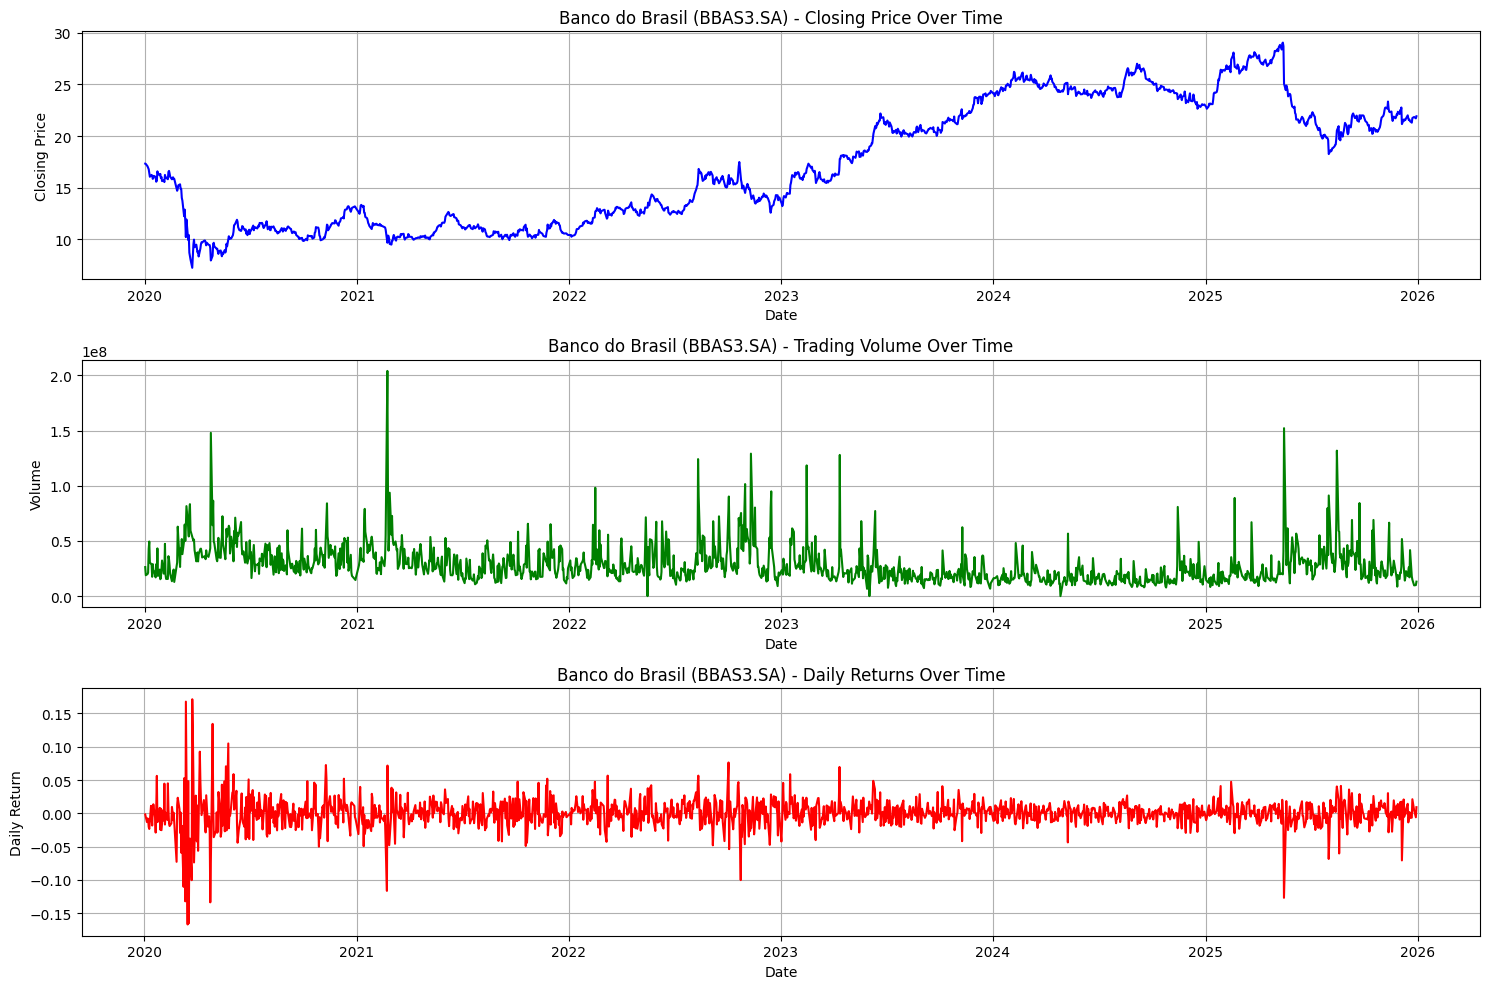

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.lineplot(data=df_banco_brasil, x=df_banco_brasil.index, y='Close_BBAS3', color='blue')
plt.title('Banco do Brasil (BBAS3.SA) - Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)

plt.subplot(3, 1, 2)
sns.lineplot(data=df_banco_brasil, x=df_banco_brasil.index, y='Volume_BBAS3', color='green')
plt.title('Banco do Brasil (BBAS3.SA) - Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

plt.subplot(3, 1, 3)
sns.lineplot(data=df_banco_brasil, x=df_banco_brasil.index, y='Daily_Return', color='red')
plt.title('Banco do Brasil (BBAS3.SA) - Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)

plt.tight_layout()
plt.show()

# Resumo dos Principais Insights dos Dados da Ação do Banco do Brasil (BBAS3.SA):

Com base na análise dos dados históricos da ação do Banco do Brasil (BBAS3.SA) no período de 01/01/2018 a 20/07/2024, os seguintes principais insights podem ser destacados:

1. **Integridade dos Dados:** O conjunto de dados apresentou-se completo, sem valores ausentes após a simplificação dos nomes de colunas em múltiplos níveis, garantindo confiabilidade para análises posteriores.

2. **Tendência do Preço de Fechamento:** O gráfico do preço de fechamento mostra períodos de volatilidade, com uma queda significativa no início de 2020 (provavelmente devido à pandemia da COVID-19), seguida por uma recuperação geral e uma tendência de alta nos anos mais recentes. Isso indica resiliência e crescimento após um grande choque de mercado.

3. **Dinâmica do Volume de Negociação:** O volume de negociação apresenta flutuações, frequentemente com picos durante períodos de alta volatilidade de preços ou eventos relevantes de notícias. Volumes elevados geralmente acompanham movimentos expressivos de preços, tanto de alta quanto de baixa, sugerindo forte interesse do mercado nesses momentos.

4. **Volatilidade dos Retornos Diários:** O gráfico de retornos diários ilustra claramente períodos de maior e menor volatilidade. Grandes picos positivos e negativos nos retornos diários correspondem a dias com variações significativas de preço, fornecendo uma medida do risco da ação ao longo do tempo. Os retornos tendem a se concentrar em torno de zero, como esperado para flutuações diárias, mas a magnitude dessas variações varia ao longo do período.


**Conclusão:**

A BBAS3 apresentou um histórico de preços dinâmico, com uma recuperação notável após a queda do mercado em 2020. Seu volume de negociação e os retornos diários refletem o comportamento típico do mercado, com aumento de atividade e volatilidade durante períodos de eventos relevantes. Esses insights são fundamentais para o desenvolvimento de modelos preditivos e para a compreensão das características de desempenho da ação.

# Correlação das variáveis

A análise de correlação entre as variáveis tem como objetivo identificar o grau de relacionamento linear
entre os principais atributos do mercado financeiro: preços de abertura (Open), máxima (High),
mínima (Low), fechamento (Close) e volume de negociação (Volume).

Observa-se que as variáveis de preço (Open, High, Low e Close) apresentam correlação muito elevada entre si,
o que era esperado, pois todas representam diferentes pontos do mesmo movimento diário do ativo.
Essa alta correlação indica que essas variáveis carregam informações semelhantes sobre o comportamento
do preço da ação ao longo do tempo.

Por outro lado, o volume de negociação apresenta uma correlação significativamente menor com os preços.
Isso sugere que, embora o volume possa indicar momentos de maior interesse do mercado ou volatilidade,
ele não se move de forma diretamente proporcional aos preços em todos os períodos analisados.

Com base nesses resultados, optou-se por utilizar inicialmente apenas o preço de fechamento (Close)
como variável alvo do modelo LSTM. Essa decisão reduz a complexidade do modelo, evita redundância de informações
altamente correlacionadas e foca na variável mais relevante para a previsão do valor futuro da ação.

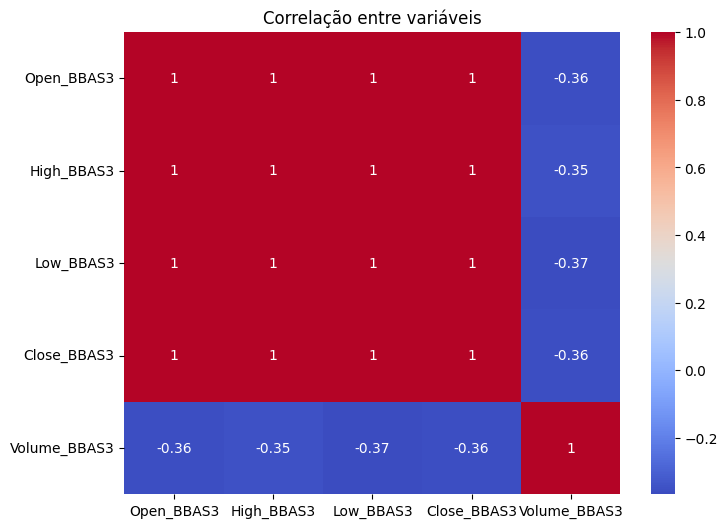

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df_banco_brasil[['Open_BBAS3','High_BBAS3','Low_BBAS3','Close_BBAS3','Volume_BBAS3']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlação entre variáveis')
plt.show()

# Preparação para o modelo LSTM

Nesta etapa, selecionamos apenas a variável de interesse para a modelagem, que é o preço de fechamento (Close_BBAS3).

O preço de fechamento é amplamente utilizado em modelos financeiros, pois representa o consenso final do mercado ao término do pregão e é o principal alvo em problemas de previsão de preços de ações.

In [ ]:
data_target = df_banco_brasil[['Close_BBAS3']].copy()

Antes de alimentar os dados em uma rede neural LSTM, realizaremos a normalização.
As redes neurais são sensíveis à escala dos dados, e valores muito altos ou muito baixos podem dificultar o processo de aprendizado.

Optamos por utilizar o MinMaxScaler para transformar os valores do preço de fechamento para um intervalo entre 0 e 1, preservando a forma da distribuição original, mas facilitando a convergência do modelo durante o treinamento.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_target)

Como o LSTM trabalha com dados sequenciais, é necessário transformar a série temporal em um formato supervisionado.

A função create_sequences cria janelas temporais (lookback) de tamanho fixo, onde cada amostra de entrada contém os preços dos últimos 60 dias, e o valor alvo corresponde ao preço de fechamento do dia seguinte.

Essa abordagem permite que o modelo aprenda padrões temporais, como tendências e movimentos recorrentes do mercado.

In [ ]:
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 90
X, y = create_sequences(scaled_data, window_size)

Após a seleção da janela temporal, dividimos os dados em conjuntos de treino e teste utilizando uma divisão temporal, preservando a ordem cronológica da série.

Essa abordagem faz evitarmos o vazamento de dados, garantindo que o modelo seja treinado apenas com informações do passado e avaliado com dados futuros, simulando um cenário real de previsão de mercado.

In [ ]:
train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Ajuste para LSTM: [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

O LSTM exige que os dados de entrada estejam no formato tridimensional:
[número de amostras, número de timesteps, número de features].

Neste caso, cada amostra contém 60 timesteps (dias) e apenas uma feature
(preço de fechamento), o que justifica o reshape aplicado aos conjuntos
de treino e teste.

O modelo LSTM **é composto por duas camadas recorrentes LSTM**, cada uma com 50 unidades (neurônios), permitindo capturar padrões temporais de curto e médio prazo na série de preços.

A **primeira camada** retorna sequências completas para alimentar a segunda camada,
enquanto a **segunda camada** retorna apenas o último estado oculto, que representa o resumo temporal da sequência.

**Camadas de Dropout** são adicionadas para reduzir o risco de overfitting, desativando aleatoriamente parte dos neurônios durante o treinamento.

A **camada Dense** final com uma unidade é responsável por gerar a previsão do preço de fechamento futuro.

In [ ]:
# model = Sequential([
#     LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
#     Dropout(0.2),

#     LSTM(50, return_sequences=False),
#     Dropout(0.2),

#     Dense(1)
# ])

model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),

    LSTM(100, return_sequences=False),
    Dropout(0.3),

    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


O modelo é compilado utilizando o otimizador Adam, escolhido por ser amplamente adotado em problemas de deep learning devido à sua eficiência e estabilidade.

A função de perda escolhida é o Mean Squared Error (MSE), adequada para problemas de regressão, pois penaliza erros maiores e incentiva previsões mais precisas.

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss='mean_squared_error'
# )

model.compile(
    optimizer='adam',
    loss='mean_absolute_error'
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

O Early Stopping é utilizado para interromper o treinamento automaticamente quando a perda no conjunto de validação deixa de melhorar.

Essa técnica ajuda a evitar overfitting e garante que o modelo final corresponda à melhor versão observada durante o treinamento.

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

O modelo é treinado utilizando o conjunto de treino, com uma fração dos dados reservada para validação.

Durante o treinamento, o modelo ajusta seus pesos de forma iterativa para minimizar o erro de previsão, aprendendo padrões temporais presentes no histórico de preços da ação.

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.1354 - val_loss: 0.0203
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0356 - val_loss: 0.0257
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - loss: 0.0355 - val_loss: 0.0286
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - loss: 0.0343 - val_loss: 0.0186
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0329 - val_loss: 0.0655
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.0335 - val_loss: 0.0459
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0327 - val_loss: 0.0415
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0310 - val_loss: 0.0180
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - loss: 0.0296 - val_loss: 0.0481
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 138ms/step - loss: 0.0342 - val_loss: 0.0266
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0327 - val_loss: 0.0320
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step

Após o treinamento, o modelo é utilizado para gerar previsões sobre o conjunto de teste, que representa dados não vistos durante o treinamento.

Essas previsões são comparadas com os valores reais para avaliar o desempenho do modelo.

In [ ]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


Como os dados foram normalizados antes do treinamento, é necessário aplicar a transformação inversa para retornar os valores previstos e reais à escala original de preços, permitindo uma interpretação mais clara dos resultados e o cálculo correto das métricas de erro.

In [ ]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Métricas

O desempenho do modelo é avaliado utilizando três métricas principais:

- **MAE (Mean Absolute Error)**: mede o erro médio absoluto em unidades monetárias.
- **RMSE (Root Mean Squared Error)**: penaliza erros maiores, sendo sensível à volatilidade.
- **MAPE (Mean Absolute Percentage Error)**: expressa o erro médio em termos percentuais, facilitando a interpretação do desempenho do modelo do ponto de vista de negócio.

In [ ]:
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")

# Window_size = 60 + loss squared error
# MAE  : 0.52
# RMSE : 0.72
# MAPE : 2.25%

# Window_size = 60 + aumento da capacidade do modelo + loss squared error
# MAE  : 0.54
# RMSE : 0.74
# MAPE : 2.33%

# Window_size = 60 + loss absolute error
# MAE  : 0.50
# RMSE : 0.69
# MAPE : 2.14%

# Window_size = 60 + aumento da capacidade do modelo + loss absolute
# MAE  : 0.52
# RMSE : 0.70
# MAPE : 2.23%

# Window_size = 90 + loss squared error
# MAE  : 0.55
# RMSE : 0.74
# MAPE : 2.36%

# Window_size = 90 + aumento da capacidade do modelo + loss squared error
# MAE  : 0.50
# RMSE : 0.68
# MAPE : 2.15%

# Window_size = 90 + loss absolute error
# MAE  : 0.47
# RMSE : 0.64
# MAPE : 2.01%

# Window_size = 90 + aumento da capacidade do modelo + loss absolute error
# MAE  : 0.44
# RMSE : 0.61
# MAPE : 1.90%

MAE  : 0.46
RMSE : 0.64
MAPE : 2.01%


O gráfico de loss de treino e validação permite avaliar o comportamento do modelo ao longo das epochs.

Curvas próximas indicam bom equilíbrio entre aprendizado e generalização, enquanto divergências significativas podem indicar overfitting ou underfitting.

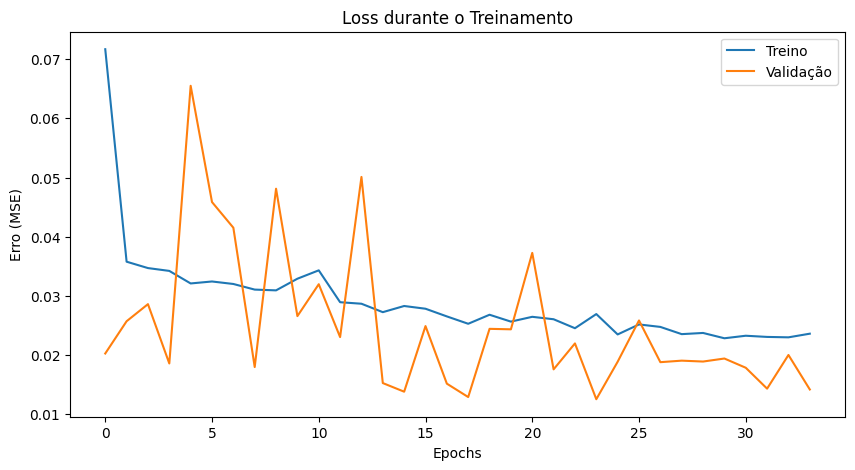

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss durante o Treinamento')
plt.xlabel('Epochs')
plt.ylabel('Erro (MSE)')
plt.legend()
plt.show()

O gráfico de valores reais VS previstos permite visualizar a capacidade do modelo de acompanhar a tendência do preço da ação.

Observa-se que o modelo tende a capturar bem o movimento geral do mercado, embora apresente maior dificuldade em períodos de alta volatilidade, o que é comum em séries financeiras.

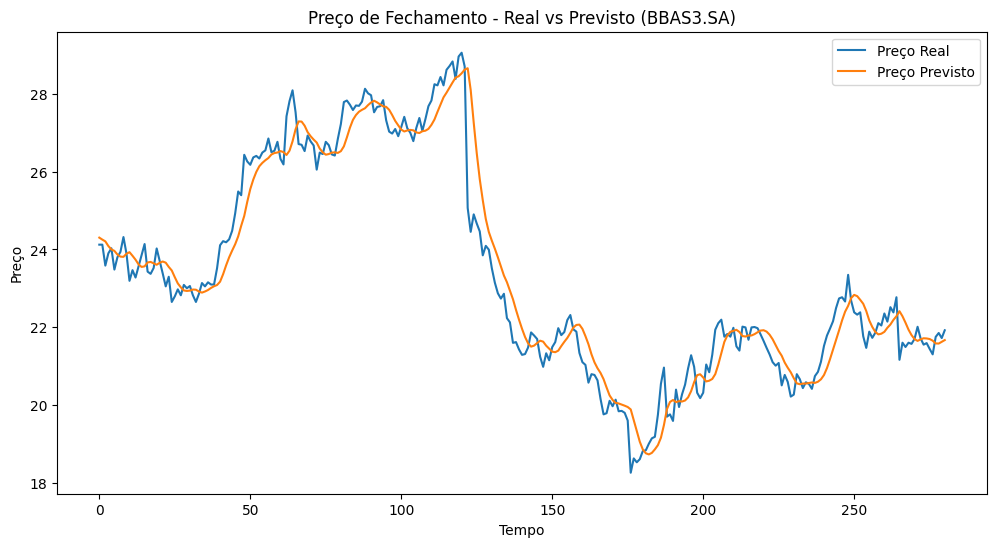

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Preço Real')
plt.plot(y_pred_inv, label='Preço Previsto')
plt.title(f'Preço de Fechamento - Real vs Previsto ({symbol_banco_brasil})')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.show()

O gráfico do erro absoluto ao longo do tempo permite identificar períodos específicos em que o modelo apresenta maior imprecisão.

Esses períodos geralmente coincidem com momentos de maior volatilidade ou eventos externos que impactam fortemente o preço da ação, reforçando as limitações inerentes a modelos baseados apenas em dados históricos.

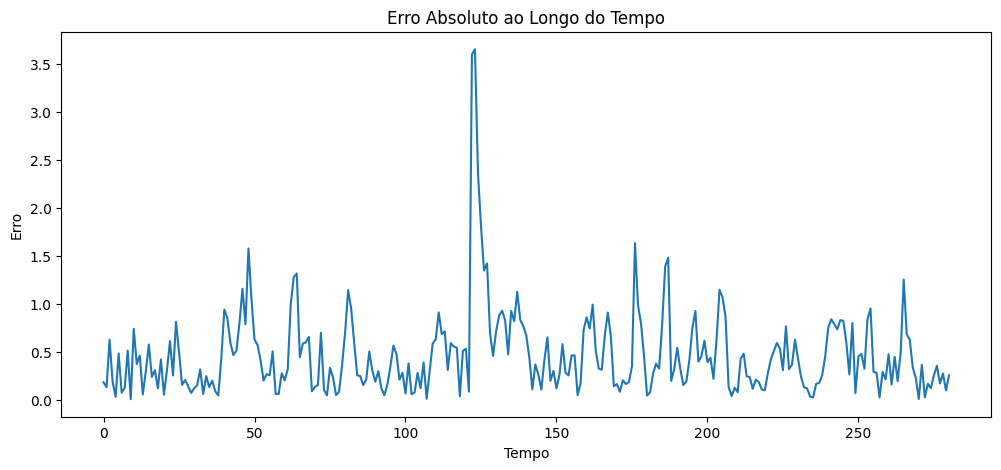

In [ ]:
error = np.abs(y_test_inv - y_pred_inv)

plt.figure(figsize=(12,5))
plt.plot(error)
plt.title('Erro Absoluto ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.show()

# Conclusão

Após a realização de diversos experimentos com diferentes configurações do modelo LSTM, observou-se que a melhor performance foi obtida com uma janela temporal de 90 dias, aumento da capacidade do modelo e utilização da função de perda Mean Absolute Error (MAE). Essa configuração apresentou os menores valores de MAE (0,44), RMSE (0,61) e MAPE (1,9%), indicando maior precisão tanto do ponto de vista técnico quanto do ponto de vista de negócio.

O aumento da janela temporal permitiu ao modelo capturar padrões de médio prazo presentes na série histórica do preço da ação, enquanto o aumento da capacidade da rede possibilitou a modelagem de relações temporais mais complexas. A utilização da função de perda MAE contribuiu para tornar o modelo mais robusto a outliers e a períodos de alta volatilidade, comuns em séries financeiras.

Os resultados demonstram que melhorias significativas no desempenho do modelo não foram alcançadas por alterações isoladas, mas sim pela combinação adequada de contexto temporal, complexidade do modelo e escolha da função de perda, evidenciando a importância do ajuste conjunto de hiperparâmetros em modelos de deep learning aplicados a séries temporais financeiras.

# Salvando o modelo

In [ ]:
# Salvando o modelo
model.save("modelo_lstm.keras")

# Salvando o scaler
import joblib
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']